In [11]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from statsmodels import api as sm

# Skriftlig innlevering 4, Oppgave 1 (av 4)


Ola og Petter har akkurat lært at stokastisk simulering også kan benyttes for å approksimere $\mu_g$ og
$\sigma_g$, og ønsker å bruke dette til å finne alternative approksimasjoner av de to størrelsene.

Når de skal benytte stokastisk simulering er det ikke tilstrekkelig bare å kjenne forventningsverdier og varianser til $S$ og $T$, man må da også anta noe om hvilke fordelinger $S$ og $T$ har. For enkelthets skyld antar de at både $S$ og $T$ er normalfordelte, de setter $\mu_s$ og $\mu_t$ lik tilhørende målte verdier for $s$ og $t$ og bruker de samme verdier for $\sigma_s$ og $\sigma_t$ som i deloppgave a).


### Deloppgave b)

Skriv pythonkode for å simulere $n=10\, 000$ realisasjoner av $G$, og bruk disse til å
approksimere $\mu_g$ og $\sigma_g$. Sammenlign med verdiene du fant i deloppgave a) og diskuter.

Tror du $G$ er normalfordelt? For å undersøke dette: Lag et sannsynlighetshistogram av de $n$ genererte verdiene for $G$ og plott deretter (i samme plott som sannsynlighetshistogrammet) sannsynlighetstettheten til en normalfordeling med forventningsverdi og standardavvik lik de approksimerte verdiene for $\mu_g$ og $\sigma_g$.


In [12]:
# Her kan du skrive pythonkoden din
mu_s = 241.3
mu_t = 7.02
sigma_s = 2.0
sigma_t = 1.0

estimated_g_mu = 2.0 * mu_s / mu_t**2
estimated_g_sigma = np.sqrt(
    4.0 * (sigma_s**2 / mu_t**4 + 4.0 * mu_s**2 * sigma_t**2 / mu_t**6)
)


def g(n: int) -> np.ndarray:
    s_values = np.random.normal(mu_s, sigma_s, n)
    t_values = np.random.normal(mu_t, sigma_t, n)
    return 2.0 * s_values / t_values**2


simulated_g = g(10_000)
simulated_g_mu = np.mean(simulated_g)
simulated_g_sigma = np.std(simulated_g)

print(f"Estimated μ_g = {estimated_g_mu}")
print(f"Simulated μ_g = {simulated_g_mu}")

print(f"Estimated σ_g = {estimated_g_sigma}")
print(f"Simulated σ_g = {simulated_g_sigma}")

Estimated μ_g = 9.792939992370194
Simulated μ_g = 10.472732004528433
Estimated σ_g = 2.791191833239769
Simulated σ_g = 3.435829846018871


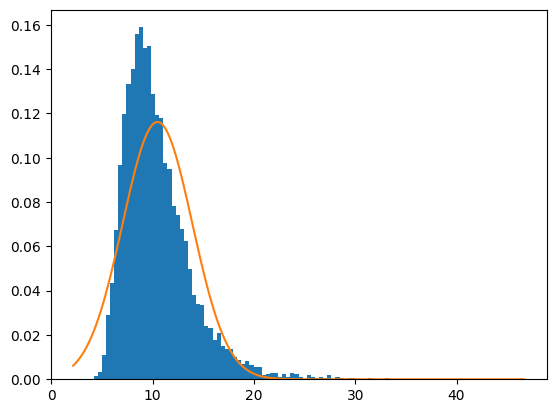

In [13]:
plt.hist(simulated_g, density=True, bins=100)
x_values = np.linspace(*plt.xlim(), 1000)
plt.plot(
    x_values,
    sp.stats.norm.pdf(x_values, simulated_g_mu, simulated_g_sigma),
)
plt.show()

## Oppgave 3 \*

Det vurderes å utbedre en lite trafikkert, men farlig veistrekning i Trondheimsområdet. I den sammenheng blir du bedt om å analysere hvor mye trafikk det er på veien. La $X$ være antall biler som passerer et bestemt punkt på veistrekningen fra kl 16:00 til kl 18:00 på en tilfeldig valgt hverdag. Vi antar at $X$ er poissonfordelt med parameter $\lambda$, dvs

\begin{align*}
f(x) = \frac{\lambda^x}{x!}e^{-\lambda},\,\,\,,x=0,1,2,\ldots
\end{align*}

Verdien til parameteren $\lambda$ er ukjent, så for å kunne estimere denne verdien oberverer vi antall passerende biler fra kl 16:00 til 18:00 på $n$ tilfeldig valgte hverdager, og lar $X_1,X_2,\ldots,X_n$ være antall biler som passerte på disse $n$ dagene.Vi antar at observasjonene er uavhengige og identisk fordelt med samme poissonfordeling som beskrevet over.


Som estimator for $\lambda$ basert på $X_1,X_2,\ldots,X_n$ og $Y_1,Y_2,\ldots,Y_m$ er det foreslått

\begin{align*}
\tilde{\lambda} = \alpha \overline{X} + \beta \overline{Y},
\end{align*}

der $\alpha,\beta\in\mathbb{R}$ er to konstanter som skal velges, og $\overline{X}=\frac 1 n \sum_{i=1}^nX_i$ og $\overline{Y}=\frac 1 m \sum_{i=1}^m Y_i$.

### Deloppgave c)

Til slutt i denne oppgaven skal du bruke stokastisk simulering til undersøke fordelingen til estimatoren $\tilde{\lambda}$ når verdiene til konstantene $\alpha$ og $\beta$ velges lik de optimale verdiene du fant i deloppgave b). La $n=42$ og $m=35$, og sett $\lambda=12$.

Skriv python-kode som $r=1000$ ganger simulerer verdier for $X_1,X_2,\ldots,X_n$ og $Y_1,Y_2,\ldots,Y_m$ og regner ut resulterende verdi for $\tilde{\lambda}$. Lag et sannsynlighetshistogram for de $r$ simulerte verdiene for $\tilde{\lambda}$. Bruk for eksempel "bins=25" som argument i pythonfunksjonen "plt.hist".


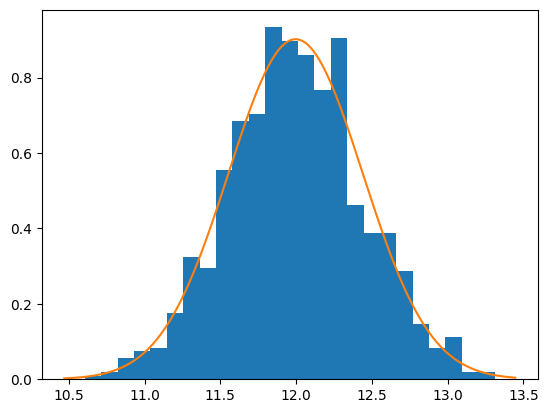

In [14]:
# Her kan du skrive kode for å simulere verdier og lage sannsynlighetshistogram
n = 42
m = 35
alpha = 2.0 * n / (2.0 * n + m)
beta = 2.0 * m / (2.0 * n + m)
lambda_exact = 12.0


def f(r: int) -> np.ndarray:
    return np.array(
        [
            alpha * np.mean(np.random.poisson(lambda_exact, n))
            + beta * np.mean(np.random.poisson(lambda_exact / 2, m))
            for _ in range(r)
        ]
    )


lambdatilde = f(1_000)
lambdatilde_mu = np.mean(lambdatilde)
lambdatilde_sigma = np.std(lambdatilde)

plt.hist(lambdatilde, density=True, bins=25)
x_values = np.linspace(*plt.xlim(), 1000)
plt.plot(
    x_values,
    sp.stats.norm.pdf(x_values, lambdatilde_mu, lambdatilde_sigma),
)
plt.show()

Greier du ut fra sannsynlighetshistogrammet å vurdere om $\tilde{\lambda}$ er normalfordelt? Hvor sikker er du i din vurdering?

Lag et normalfordelingsplott (qq-plot) basert på de $r$ simulerte verdiene for $\tilde{\lambda}$. Ser $\tilde{\lambda}$ ut til å være normalfordelt? <em>Hint: Du kan bruke pythonfunksjonen "qqplot" i modulen statsmodels for å generere et qq-plot. Under ser du hvordan du kan laste inn modulen statsmodel og hvordan du kan kalle funksjonen qqplot. Her er det antatt at dine simulerte verdier for $\tilde{\lambda}$ ligger i en vektor med navn "lambdatilde".</em>

Kan du gi en teoretisk begrunnelse for at $\hat{\lambda}$ er (i hvert fall tilnærmet) normalfordelt?


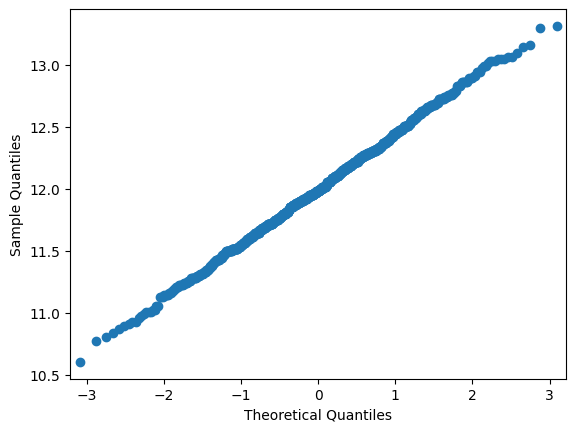

In [15]:
sm.qqplot(lambdatilde)
plt.show()

## Oppgave 5

Det er vanlig at gjennomsnittstemperaturen i mars er lavere enn gjennomsnittstemperaturen i april. I 2012 var det mange steder i Norge kaldere i april enn i mars.

Vi lar $X$ være gjennomsnittstemperatur i mars og $Y$ gjennomsnitsstemperatur i april ved Værnes et gitt år, begge målt i $^\circ C$. Anta at $X$ er normalfordelt med ukjent forventningsverdi $\mu_m$ og varians $\sigma^2$, og at $Y$ er normalfordelt med ukjent forventningsverdi $\mu_a$ og varians $\sigma^2$.

### Deloppgave a)

Anta at vi har data for verdier av $X$ og $Y$ fra $n=12$ ulike år. Du kan anta at dette er et tilfeldig utvalg. Forklar hvordan du kan grafisk undersøke om antakelse om normalfordeling holder. Hvordan kan du undersøke grafisk om $X$ og $Y$ er uavhengige?

Du skal nå gjennomføre den grafiske undersøkelsen med den gitte dataen gitt under. Begrunn om normalantakelsen holder, og om det virker som $X$ og $Y$ er uavhengige.
<font size="1">
\begin{array}{c|c|c|c|c|c|c|c|c|c|c|c}
& 2001 & 2002 & 2003 & 2004 & 2005 & 2006 & 2007 & 2008 & 2009 & 2010 & 2011 & 2012\\
\hline
x & -2.5 & 0.5 & 3.3 & 2.6 & -0.7 & -4.6 & 3.3 & 0.8 & 1.9 & -0.5 & 1.2 & 3.8 \\
y & 4.1 & 7.2 & 5.0 & 7.9 & 5.8 & 4.9 & 5.0 & 5.9 & 6.9 & 4.8 & 6.7 & 3.2
\end{array}
</font>


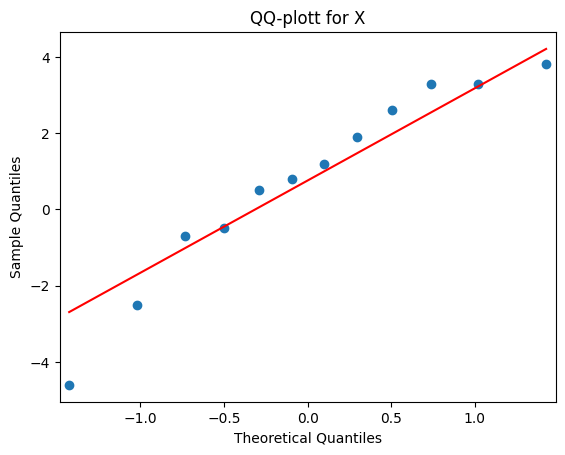

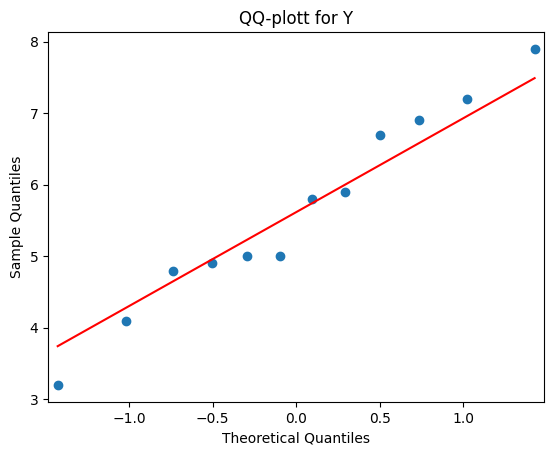

Undersøker om X og Y følger en normalfordeling ved å analysere deres QQ-plott. Det ser ut til at X og Y følger en normalfordeling, siden punktene ligger tett inntil den rette linjen.


In [16]:
x = np.array([-2.5, 0.5, 3.3, 2.6, -0.7, -4.6, 3.3, 0.8, 1.9, -0.5, 1.2, 3.8])
y = np.array([4.1, 7.2, 5.0, 7.9, 5.8, 4.9, 5.0, 5.9, 6.9, 4.8, 6.7, 3.2])

# Normalantakelse
sm.qqplot(x, line="s")
plt.title("QQ-plott for X")
plt.show()
sm.qqplot(y, line="s")
plt.title("QQ-plott for Y")
plt.show()

print(
    "Undersøker om X og Y følger en normalfordeling ved å analysere deres "
    "QQ-plott. Det ser ut til at X og Y følger en normalfordeling, siden "
    "punktene ligger tett inntil den rette linjen."
)

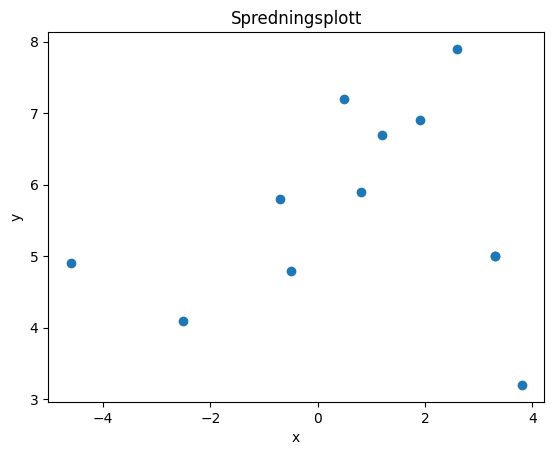

Undersøker om X og Y er uavhengige ved å analysere et spredningsplott. Det ser ut til at X og Y er uavhengige, siden det ikke er noen tydelig sammenheng mellom x og y.


In [17]:
# Uavhengighet mellom X og Y
plt.scatter(x, y)
plt.title("Spredningsplott")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(
    "Undersøker om X og Y er uavhengige ved å analysere et spredningsplott. "
    "Det ser ut til at X og Y er uavhengige, siden det ikke er noen tydelig "
    "sammenheng mellom x og y."
)

### Deloppgave b)

Anta at temperaturene fra mars er uavhengige fra et år til et annet. Finn et $99\%$-konfidensintervall for forventet gjennomsnittstemperatur i mars.


In [18]:
mu_x = np.mean(x)
s_x = np.std(x, ddof=1)
n = len(x)
z_a = sp.stats.t.ppf(1 - 0.01 / 2, n - 1)
diff = z_a * s_x / np.sqrt(n)

interval = [mu_x - diff, mu_x + diff]

print(f"Intervall: {[round(elem, 3) for elem in interval]}")

Intervall: [-1.506, 3.023]
